## Telecommunication Case Study : Churn Prediction

**Problem Statement** - Dataset contains various features about a customer like Gender,
SeniorCitizen, Partner, Dependents etc.. , predict if the customer will *churn or
not*.

### Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics

### Load the Data

In [2]:
df=pd.read_csv('churn_dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Remove unwanted column

In [6]:
del df['customerID']

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape

(7043, 20)

### Handling Null values

In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Changing Data Type

In [10]:
# Total charges are in object dtype so convert into Numerical feature 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
df[df["tenure"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
df.drop(labels=df[df["tenure"] == 0].index, axis = 0, inplace = True)

In [14]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [15]:
df.SeniorCitizen = df.SeniorCitizen.map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Separate into Numerical and Categorical feature

In [16]:
# numerical feature
numerical_feature = {feature for feature in df.columns if df[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 3
Numerical feature are:
 {'tenure', 'TotalCharges', 'MonthlyCharges'}


In [17]:
# Categorical feature
categorical_feature = {feature for feature in df.columns if df[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 17
Categorical feature are:
 {'StreamingMovies', 'Contract', 'PaymentMethod', 'StreamingTV', 'OnlineBackup', 'OnlineSecurity', 'Dependents', 'DeviceProtection', 'gender', 'PaperlessBilling', 'Partner', 'Churn', 'MultipleLines', 'PhoneService', 'SeniorCitizen', 'TechSupport', 'InternetService'}


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [19]:
df.describe(include=["object", "bool"]).T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,No,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


### Features Selection

- Select features which have higher correlation

In [20]:
del df['gender']
del df['SeniorCitizen']

In [21]:
df.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.shape

(7032, 18)

### Identify the Target Variable

In [23]:
# Identifying the inputs (X) and output (y)

y = df['Churn']  # Target Variable

X = df[['PaperlessBilling', 'Dependents', 'InternetService','Contract', 
        'Partner', 'OnlineSecurity', 'PhoneService', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 
        'MultipleLines', 'TechSupport', 'OnlineBackup','DeviceProtection',
        'MonthlyCharges', 'tenure', 'TotalCharges']]

### Model Selection

**Algorithm Type :** Supervised

**Task :** Classification (Since the target variable is catagorical)

### Split into Train and Test Data

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [25]:
X_train.head()

,PaperlessBilling,Dependents,InternetService,Contract,Partner,OnlineSecurity,PhoneService,StreamingTV,StreamingMovies,PaymentMethod,MultipleLines,TechSupport,OnlineBackup,DeviceProtection,MonthlyCharges,tenure,TotalCharges
5523,Yes,No,Fiber optic,Month-to-month,Yes,No,Yes,No,No,Bank transfer (automatic),No,No,No,No,69.20,7,477.55
1676,Yes,No,Fiber optic,Month-to-month,No,Yes,Yes,No,No,Electronic check,Yes,No,No,No,80.15,4,319.85
511,Yes,No,Fiber optic,Month-to-month,No,Yes,Yes,Yes,Yes,Electronic check,Yes,No,No,Yes,106.45,61,6300.15
1595,Yes,No,Fiber optic,Month-to-month,No,No,Yes,No,No,Electronic check,No,No,Yes,No,74.70,2,165.40
3329,Yes,No,DSL,Month-to-month,Yes,No,Yes,No,No,Mailed check,No,Yes,No,No,50.30,18,908.75


In [26]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(5274, 17) (5274,)
(1758, 17) (1758,)


### Data Pre-Processing on Train data

#### Separating Categorical and Numerical Columns

In [27]:
X_train.head()

,PaperlessBilling,Dependents,InternetService,Contract,Partner,OnlineSecurity,PhoneService,StreamingTV,StreamingMovies,PaymentMethod,MultipleLines,TechSupport,OnlineBackup,DeviceProtection,MonthlyCharges,tenure,TotalCharges
5523,Yes,No,Fiber optic,Month-to-month,Yes,No,Yes,No,No,Bank transfer (automatic),No,No,No,No,69.20,7,477.55
1676,Yes,No,Fiber optic,Month-to-month,No,Yes,Yes,No,No,Electronic check,Yes,No,No,No,80.15,4,319.85
511,Yes,No,Fiber optic,Month-to-month,No,Yes,Yes,Yes,Yes,Electronic check,Yes,No,No,Yes,106.45,61,6300.15
1595,Yes,No,Fiber optic,Month-to-month,No,No,Yes,No,No,Electronic check,No,No,Yes,No,74.70,2,165.40
3329,Yes,No,DSL,Month-to-month,Yes,No,Yes,No,No,Mailed check,No,Yes,No,No,50.30,18,908.75


In [28]:
X_train.dtypes

PaperlessBilling     object
Dependents           object
InternetService      object
Contract             object
Partner              object
OnlineSecurity       object
PhoneService         object
StreamingTV          object
StreamingMovies      object
PaymentMethod        object
MultipleLines        object
TechSupport          object
OnlineBackup         object
DeviceProtection     object
MonthlyCharges      float64
tenure                int64
TotalCharges        float64
dtype: object

In [29]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,PaperlessBilling,Dependents,InternetService,Contract,Partner,OnlineSecurity,PhoneService,StreamingTV,StreamingMovies,PaymentMethod,MultipleLines,TechSupport,OnlineBackup,DeviceProtection
5523,Yes,No,Fiber optic,Month-to-month,Yes,No,Yes,No,No,Bank transfer (automatic),No,No,No,No
1676,Yes,No,Fiber optic,Month-to-month,No,Yes,Yes,No,No,Electronic check,Yes,No,No,No
511,Yes,No,Fiber optic,Month-to-month,No,Yes,Yes,Yes,Yes,Electronic check,Yes,No,No,Yes
1595,Yes,No,Fiber optic,Month-to-month,No,No,Yes,No,No,Electronic check,No,No,Yes,No
3329,Yes,No,DSL,Month-to-month,Yes,No,Yes,No,No,Mailed check,No,Yes,No,No


In [30]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,MonthlyCharges,tenure,TotalCharges
5523,69.20,7,477.55
1676,80.15,4,319.85
511,106.45,61,6300.15
1595,74.70,2,165.40
3329,50.30,18,908.75


#### Scaling the Numerical Features

In [31]:
# Using Standardization method

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,MonthlyCharges,tenure,TotalCharges
5523,0.151080,-1.035648,-0.795902
1676,0.514997,-1.157923,-0.865409
511,1.389062,1.165295,1.770434
1595,0.333869,-1.239439,-0.933484
3329,-0.477051,-0.587308,-0.605849


In [32]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,5274.0,64.654124,30.092133,18.25,35.500,70.250,89.850,118.75
tenure,5274.0,32.409556,24.537263,1.00,9.000,29.000,55.000,72.00
TotalCharges,5274.0,2283.323341,2269.052626,18.85,395.725,1394.325,3778.075,8684.80


In [33]:
#print("Number of Numerical Features:", scaler.n_features_in_)
#print()
print("Mean of each column:", scaler.mean_)
print()
print("Std of each column:", np.sqrt(scaler.var_))

Mean of each column: [  64.654124     32.40955631 2283.32334092]

Std of each column: [  30.08927977   24.5349362  2268.83749925]


#### Applying One Hot Encoding on Categorical Columns

In [34]:
X_train_cat.head()

,PaperlessBilling,Dependents,InternetService,Contract,Partner,OnlineSecurity,PhoneService,StreamingTV,StreamingMovies,PaymentMethod,MultipleLines,TechSupport,OnlineBackup,DeviceProtection
5523,Yes,No,Fiber optic,Month-to-month,Yes,No,Yes,No,No,Bank transfer (automatic),No,No,No,No
1676,Yes,No,Fiber optic,Month-to-month,No,Yes,Yes,No,No,Electronic check,Yes,No,No,No
511,Yes,No,Fiber optic,Month-to-month,No,Yes,Yes,Yes,Yes,Electronic check,Yes,No,No,Yes
1595,Yes,No,Fiber optic,Month-to-month,No,No,Yes,No,No,Electronic check,No,No,Yes,No
3329,Yes,No,DSL,Month-to-month,Yes,No,Yes,No,No,Mailed check,No,Yes,No,No


In [35]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,PaperlessBilling_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,Partner_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,PhoneService_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,TechSupport_No internet service,TechSupport_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5523,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1676,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
511,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1595,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3329,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [36]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe ], axis=1)

X_train_transformed.head()

,MonthlyCharges,tenure,TotalCharges,PaperlessBilling_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,Partner_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,TechSupport_No internet service,TechSupport_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5523,0.151080,-1.035648,-0.795902,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1676,0.514997,-1.157923,-0.865409,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
511,1.389062,1.165295,1.770434,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1595,0.333869,-1.239439,-0.933484,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3329,-0.477051,-0.587308,-0.605849,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Data Pre-Processing on Test Data

In [37]:
X_test.head()

,PaperlessBilling,Dependents,InternetService,Contract,Partner,OnlineSecurity,PhoneService,StreamingTV,StreamingMovies,PaymentMethod,MultipleLines,TechSupport,OnlineBackup,DeviceProtection,MonthlyCharges,tenure,TotalCharges
942,Yes,No,Fiber optic,Month-to-month,No,No,Yes,No,Yes,Credit card (automatic),No,No,No,No,79.85,24,2001.00
3730,Yes,No,Fiber optic,Month-to-month,Yes,No,Yes,Yes,Yes,Credit card (automatic),Yes,No,Yes,Yes,104.50,57,5921.35
1761,Yes,No,No,Two year,No,No internet service,Yes,No internet service,No internet service,Credit card (automatic),Yes,No internet service,No internet service,No internet service,24.45,58,1513.60
2283,Yes,No,Fiber optic,Month-to-month,No,No,Yes,No,No,Mailed check,No,No,No,No,71.55,1,71.55
1872,No,Yes,No,Two year,Yes,No internet service,Yes,No internet service,No internet service,Bank transfer (automatic),No,No internet service,No internet service,No internet service,19.70,41,804.25


In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 942 to 1506
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PaperlessBilling  1758 non-null   object 
 1   Dependents        1758 non-null   object 
 2   InternetService   1758 non-null   object 
 3   Contract          1758 non-null   object 
 4   Partner           1758 non-null   object 
 5   OnlineSecurity    1758 non-null   object 
 6   PhoneService      1758 non-null   object 
 7   StreamingTV       1758 non-null   object 
 8   StreamingMovies   1758 non-null   object 
 9   PaymentMethod     1758 non-null   object 
 10  MultipleLines     1758 non-null   object 
 11  TechSupport       1758 non-null   object 
 12  OnlineBackup      1758 non-null   object 
 13  DeviceProtection  1758 non-null   object 
 14  MonthlyCharges    1758 non-null   float64
 15  tenure            1758 non-null   int64  
 16  TotalCharges      1758 non-null   float6

In [39]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,PaperlessBilling,Dependents,InternetService,Contract,Partner,OnlineSecurity,PhoneService,StreamingTV,StreamingMovies,PaymentMethod,MultipleLines,TechSupport,OnlineBackup,DeviceProtection
942,Yes,No,Fiber optic,Month-to-month,No,No,Yes,No,Yes,Credit card (automatic),No,No,No,No
3730,Yes,No,Fiber optic,Month-to-month,Yes,No,Yes,Yes,Yes,Credit card (automatic),Yes,No,Yes,Yes
1761,Yes,No,No,Two year,No,No internet service,Yes,No internet service,No internet service,Credit card (automatic),Yes,No internet service,No internet service,No internet service
2283,Yes,No,Fiber optic,Month-to-month,No,No,Yes,No,No,Mailed check,No,No,No,No
1872,No,Yes,No,Two year,Yes,No internet service,Yes,No internet service,No internet service,Bank transfer (automatic),No,No internet service,No internet service,No internet service


In [40]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,MonthlyCharges,tenure,TotalCharges
942,79.85,24,2001.00
3730,104.50,57,5921.35
1761,24.45,58,1513.60
2283,71.55,1,71.55
1872,19.70,41,804.25


In [41]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,MonthlyCharges,tenure,TotalCharges
942,0.505026,-0.342758,-0.124435
3730,1.324255,1.002262,1.603476
1761,-1.336161,1.043021,-0.339259
2283,0.229180,-1.280197,-0.974849
1872,-1.494025,0.350131,-0.651908


In [42]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,PaperlessBilling_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,Partner_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,PhoneService_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,TechSupport_No internet service,TechSupport_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
942,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3730,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1761,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2283,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1872,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [43]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,MonthlyCharges,tenure,TotalCharges,PaperlessBilling_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,Partner_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,TechSupport_No internet service,TechSupport_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
942,0.505026,-0.342758,-0.124435,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3730,1.324255,1.002262,1.603476,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1761,-1.336161,1.043021,-0.339259,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2283,0.229180,-1.280197,-0.974849,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1872,-1.494025,0.350131,-0.651908,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Model Building

### Logistic Regression

In [44]:
import time
st=time.time()

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_transformed, y_train)

et=time.time()
elapsed_time = et - st
print(elapsed_time,'s')

0.16788768768310547 s


In [45]:
y_test_pred = regressor.predict(X_test_transformed)

In [46]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [47]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.8003412969283277


### Support Vector Classifier

In [48]:
st=time.time()

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transformed, y_train)

et=time.time()
elapsed_time = et - st
print(elapsed_time,'s')

1.5244600772857666 s


In [49]:
y_test_pred = svc.predict(X_test_transformed)

In [50]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [51]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.7940841865756542


### K-Neighbors Classifier

In [52]:
st=time.time()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

et=time.time()
elapsed_time = et - st
print(elapsed_time,'s')

0.06395411491394043 s


In [53]:
y_test_pred = knn.predict(X_test_transformed)

In [54]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [55]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.7599544937428896


### Decision Tree Classifier

In [56]:
st=time.time()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_transformed, y_train)

et=time.time()
elapsed_time = et - st
print(elapsed_time,'s')

0.06399345397949219 s


In [57]:
y_test_pred = dt.predict(X_test_transformed)

In [58]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [59]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.7320819112627986


### Random Forest Classifier

In [60]:
st=time.time()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train)

et=time.time()
elapsed_time = et - st
print(elapsed_time,'s')

0.9568095207214355 s


In [61]:
y_test_pred = rf.predict(X_test_transformed)

In [62]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [63]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.78839590443686


In [64]:
dict_={'Model Performed':
['Logistic Regression','Support Vector Classifier','K-Neighbors Classifier','Decision Tree Classifier','Random Forest Classifier'],
'Accuracy': [0.8003412969283277,0.7940841865756542,0.7599544937428896,0.7178612059158134,0.782707622298066],
'Time Taken': ['0.08477234840393066 s','1.6007211208343506 s','0.004984855651855469 s','0.050862789154052734 s','1.0960972309112549 s']}


dataframe=pd.DataFrame(dict_,index=[1,2,3,4,5])
dataframe

,Model Performed,Accuracy,Time Taken
1,Logistic Regression,0.800341,0.08477234840393066 s
2,Support Vector Classifier,0.794084,1.6007211208343506 s
3,K-Neighbors Classifier,0.759954,0.004984855651855469 s
4,Decision Tree Classifier,0.717861,0.050862789154052734 s
5,Random Forest Classifier,0.782708,1.0960972309112549 s


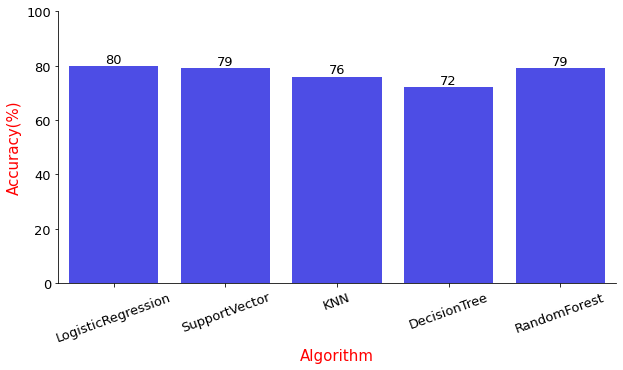

In [94]:
algo=['LogisticRegression','SupportVector','KNN','DecisionTree','RandomForest']
accur=[80,79,76,72,79]

plt.figure(figsize=(10, 5))

p=sns.barplot(y=accur,x=algo,color='b',alpha=0.8)
p.set_xlabel("Algorithm", fontsize = 15,color='r')
p.set_ylabel("Accuracy(%)", fontsize = 15,color='r')

plt.xticks(rotation = 20)
plt.xticks(size=13)
plt.yticks(size=13)
p.bar_label(p.containers[0],size=13)
plt.ylim(0,100) 

sns.despine()
plt.show()

### Transforming Target Variable to Numeric

In [65]:
df.Churn = df.Churn.map({'Yes':1,'No':0})
df.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [66]:
y = df['Churn']  # Target Variable

X = df[['PaperlessBilling', 'Dependents', 'InternetService','Contract', 
        'Partner', 'OnlineSecurity', 'PhoneService', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 
        'MultipleLines', 'TechSupport', 'OnlineBackup','DeviceProtection',
        'MonthlyCharges', 'tenure', 'TotalCharges']]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [68]:
X_train.head()

,PaperlessBilling,Dependents,InternetService,Contract,Partner,OnlineSecurity,PhoneService,StreamingTV,StreamingMovies,PaymentMethod,MultipleLines,TechSupport,OnlineBackup,DeviceProtection,MonthlyCharges,tenure,TotalCharges
5523,Yes,No,Fiber optic,Month-to-month,Yes,No,Yes,No,No,Bank transfer (automatic),No,No,No,No,69.20,7,477.55
1676,Yes,No,Fiber optic,Month-to-month,No,Yes,Yes,No,No,Electronic check,Yes,No,No,No,80.15,4,319.85
511,Yes,No,Fiber optic,Month-to-month,No,Yes,Yes,Yes,Yes,Electronic check,Yes,No,No,Yes,106.45,61,6300.15
1595,Yes,No,Fiber optic,Month-to-month,No,No,Yes,No,No,Electronic check,No,No,Yes,No,74.70,2,165.40
3329,Yes,No,DSL,Month-to-month,Yes,No,Yes,No,No,Mailed check,No,Yes,No,No,50.30,18,908.75


In [69]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(5274, 17) (5274,)
(1758, 17) (1758,)


In [70]:
y_train.unique()

array([0, 1], dtype=int64)

In [71]:
y_train.unique()

array([0, 1], dtype=int64)

## Model Building

### Logistic Regression

In [72]:
regressor.fit(X_train_transformed, y_train)

LogisticRegression()

In [73]:
y_test_pred = regressor.predict(X_test_transformed)

In [74]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
942,0,0
3730,1,0
1761,0,0
2283,1,1
1872,0,0


In [75]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.8003412969283277


### Support Vector Classifier

In [76]:
svc.fit(X_train_transformed, y_train)

SVC()

In [77]:
y_test_pred = svc.predict(X_test_transformed)

In [78]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
942,0,0
3730,1,0
1761,0,0
2283,1,1
1872,0,0


In [79]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.7940841865756542


### K-Neighbors Classifier

In [80]:
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [81]:
y_test_pred = knn.predict(X_test_transformed)

In [82]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
942,0,0
3730,1,0
1761,0,0
2283,1,1
1872,0,0


In [83]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.7599544937428896


### Decision Tree Classifier

In [84]:
dt.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [85]:
y_test_pred = dt.predict(X_test_transformed)

In [86]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
942,0,0
3730,1,1
1761,0,0
2283,1,1
1872,0,0


In [87]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.7281001137656428


### Random Forest Classifier

In [88]:
rf.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [89]:
y_test_pred = rf.predict(X_test_transformed)

In [90]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
942,0,0
3730,1,0
1761,0,0
2283,1,1
1872,0,0


In [91]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.78839590443686


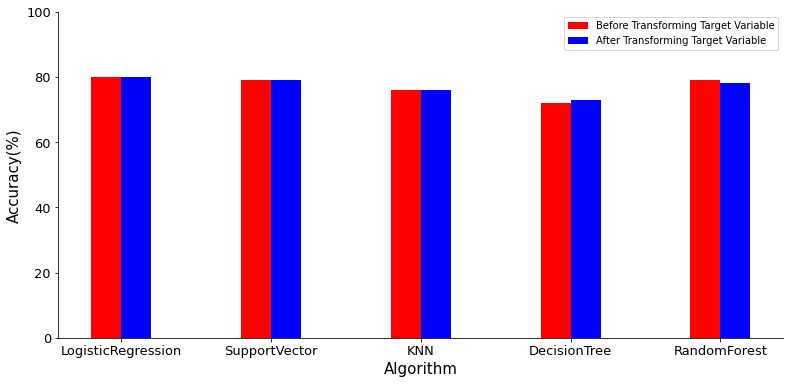

In [93]:
algo=['LogisticRegression','SupportVector','KNN','DecisionTree','RandomForest']
accur1=[80,79,76,72,79]
accur2=[80,79,76,73,78]
plt.figure(figsize=(13, 6))

width=0.2
p=np.arange(len(algo))
p1=[j+width for j in p]

plt.xlabel('Algorithm',fontsize=15)   
plt.ylabel('Accuracy(%)',fontsize=15)

  
plt.bar(p,accur1,width,color='r',label='Before Transforming Target Variable')
plt.bar(p1,accur2,width,color='b',label='After Transforming Target Variable')

plt.xticks(p+width/2,algo)
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylim(0,100)
sns.despine()
plt.legend()
plt.show()

### Conclusion -->

- We achieved about **80%** accuracy on both the test.
- Furthermore, came into the conclusion that the best algorithm to predict customer churn is **Logistic Regression** with a time span around 70 ms.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue.